<a href="https://colab.research.google.com/github/thanktua-spp/machine-learning-fundamentals/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plotting cosmetics
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')

In [3]:
# n_features Number of features {X1, X2}
# Center is the number of classes {2classes 0, 1}

X, y = make_blobs(n_samples=50, centers=2, n_features=2, cluster_std=2)

X.shape, y.shape

((50, 2), (50,))

In [4]:
y = y.reshape(-1, 1)
y.shape

(50, 1)

In [5]:
X[:10]

array([[ 4.96282127, -3.20534998],
       [ 0.58225123,  3.59839867],
       [-3.00153449,  0.85853259],
       [ 2.50938957, -6.04975986],
       [ 0.79274024, -4.21335074],
       [ 1.79452256, -3.89976738],
       [ 1.51234342, -5.80970094],
       [ 1.99461707, -6.42182028],
       [ 2.33262509, -1.95730091],
       [ 0.44110547,  2.77894265]])

In [6]:
y[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

Text(0, 0.5, 'X2')

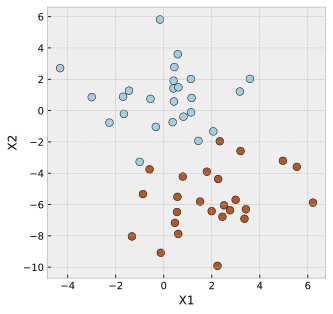

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired_r', edgecolors='k', s=60);
plt.xlabel('X1')
plt.ylabel('X2')

In [8]:
W = np.zeros((2,1))
W.shape

(2, 1)

In [9]:
#y_hat = wx + b

In [10]:
def init_params(X_train):
  """
  Zero initialize parameters using the number of features
  """
  n_features = X_train.shape[1]

  # Zero_initialize
  Weight_param = np.zeros((n_features,1))

  return Weight_param

W = init_params(X)
W

array([[0.],
       [0.]])

In [11]:
def compute_z(X_train, W):
  z = np.matmul(X_train, W)
  return z

z = compute_z(X, W)
z[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
def sigmoid(z):
  y_hat = 1 / (1 + np.exp(-z))
  return y_hat

y_hat = sigmoid(z)
y_hat[:10]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

Text(0, 0.5, 'Z')

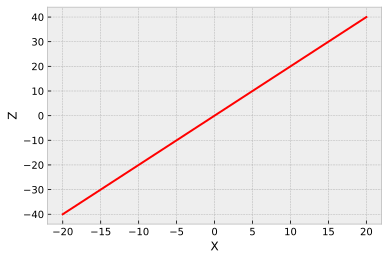

In [13]:
range = np.linspace(-20,20,50)
plt.plot(range, range*2, 'r')
plt.xlabel('X')
plt.ylabel('Z')

[]

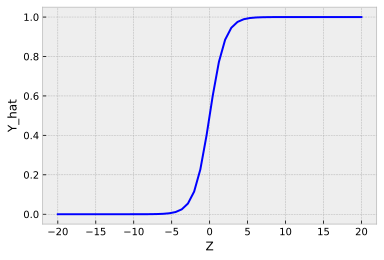

In [14]:
plt.plot(range, sigmoid(range), 'b')
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.plot()

In [15]:
def comput_cost(y_train, y_hat):
  loss = -(y_train * np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
  cost = np.mean(loss)  

  return cost

cost = comput_cost(y, y_hat)
cost

0.6931471805599453

In [16]:
X.shape

(50, 2)

In [17]:
y.shape, y_hat.shape

((50, 1), (50, 1))

In [18]:
(np.dot(X.T, (y_hat - y))).shape

(2, 1)

In [19]:
def compute_gradients(X_train, y_train, y_hat):
  weight_grads = (1/X_train.shape[0])*(np.dot(X_train.T, (y_hat - y_train)))
  return weight_grads

y_hat = sigmoid(z)
W_grad = compute_gradients(X, y, y_hat)
W_grad

array([[-3.90409012],
       [-2.89291933]])

In [20]:
def update_grad(W, W_grad, lr = 0.01):
  updategrads = W - lr*W_grad

  assert updategrads.shape == W.shape
  return updategrads

W_new = update_grad(W, W_grad, lr = 0.01)
W_new

array([[0.0390409 ],
       [0.02892919]])

In [21]:
del range

In [22]:
def fit_classifier(X_train, y_train, epochs, lr = 0.01):
  cost_list = []
  W = init_params(X_train)
  
  for i in range(epochs):
    z = compute_z(X_train, W)
    y_hat = sigmoid(z)
    cost = comput_cost(y_train, y_hat)
    grads = compute_gradients(X_train, y_train, y_hat)
    W = update_grad(W, grads)
    cost_list.append(cost)
    #print(cost)
  return cost_list, W

epochs = 100
cost_history, weights =  fit_classifier(X, y, epochs, lr = 0.01)

In [23]:
#cost_history

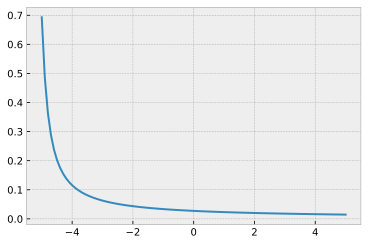

In [24]:
plt.plot(np.linspace(-5,5, len(cost_history)), cost_history)

In [25]:
weights

array([[0.38474701],
       [0.2794184 ]])

In [26]:
z = compute_z(X, weights)
y_hat = sigmoid(z)
y_hat;

In [27]:
y_cat = np.zeros(y.shape)
y_cat;

z = compute_z(X, weights)
y_hat = sigmoid(z)
y_cat[y_hat > 0.5] = 1

In [28]:
y[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [29]:
y_cat[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [30]:
np.sum(y_cat == y)

50

In [31]:
accuracy = np.sum(y_cat == y)/X.shape[0]
accuracy

1.0

In [32]:
test = np.array([[7, -8]])

In [33]:
y_cat = np.zeros((test.shape[0],1))
y_pred = 1/(1+np.exp(-np.dot(test, W)))
y_cat.shape, y_pred.shape

((1, 1), (1, 1))

In [34]:
y_cat[y_pred > 0.5]

array([], dtype=float64)

In [35]:
def predict(X, W):
  y_cat = np.zeros((X.shape[0],1))

  z = compute_z(X, weights)
  y_pred = sigmoid(z)
  y_cat[y_pred > 0.5] = 1
  return y_cat


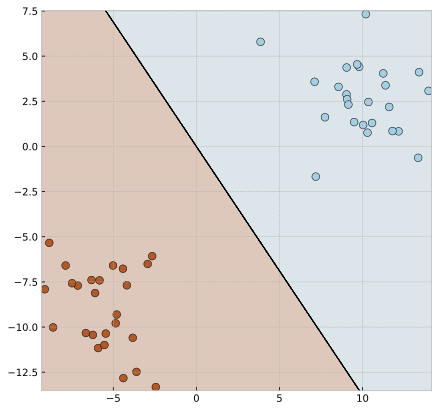

In [36]:
def plot_decision_boundary(W, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], W)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', s=60);


plot_decision_boundary(W, X, y)

In [37]:
test = np.array([[-6, 0]])
predict(test, W)

array([[0.]])

In [38]:
predict(X, W);

In [39]:
class Logistic_Regression():
  def __init__(self):
    self.model_weight = None #np.zeros((1,1))

  def _init_params(self, X_train):
    """
    Zero initialize parameters using the number of features
    """
    n_features = X_train.shape[1]
    self.model_weight = np.zeros((n_features,1))
    return self.model_weight

  def _compute_z(self, X_train):
    z = np.matmul(X_train, self.model_weight)
    return z

  def _sigmoid(self, z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat


  def _comput_cost(self, y_train, y_hat):
    loss = -(y_train * np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
    cost = np.mean(loss)  
    return cost

  def _compute_gradients(self, X_train, y_train, y_hat):
    weight_grads = (1/X_train.shape[0])*(np.dot(X_train.T, (y_hat - y_train)))
    return weight_grads

  def _update_grad(self, W_grad, lr = 0.01):
    self.model_weight = self.model_weight - lr*W_grad
    assert W_grad.shape == self.model_weight.shape
    return W_grad

  def fit_classifier(self, X_train, y_train, epochs, lr = 0.01):
    self.model_weight = self._init_params(X_train)

    cost_list = []
    for i in range(epochs):
      z = self._compute_z(X_train)
      y_hat = self._sigmoid(z)
      cost = self._comput_cost(y_train, y_hat)
      grads = self._compute_gradients(X_train, y_train, y_hat)
      self.model_weight = self._update_grad(grads)
      cost_list.append(cost)
    return cost_list

  def predict(self, X_train):
    y_cat = np.zeros((X_train.shape[0],1))
    z = self._compute_z(X_train)
    y_pred = self._sigmoid(z)
    y_cat[y_pred > 0.5] = 1
    return y_cat


binary_model = Logistic_Regression()
epochs = 100
history =  binary_model.fit_classifier(X, y, epochs)
#binary_model.predict(X)

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [38]:
binary_model.model_weight

array([[ 1.04117466],
       [-3.43904491]])

In [25]:
class A:
  def _a(self):
    return 2

  def b(self):
    print(self._a())

new_A = A()
new_A.b()

2
